Project: Sales Performance Analysis & Forecasting
Objective:
This project aims to analyze historical sales data, identify trends, and forecast future sales using Time Series Analysis (ARIMA) and Machine Learning (Random Forest Regression). This analysis helps businesses make data-driven decisions, optimize inventory, and improve sales strategies.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [9]:
# Load dataset
df = pd.read_csv("C:/Users/ADMIN/Downloads/sales_data (1).csv")
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df = df.groupby('Date').agg({'Total_Sales': 'sum'}).reset_index()


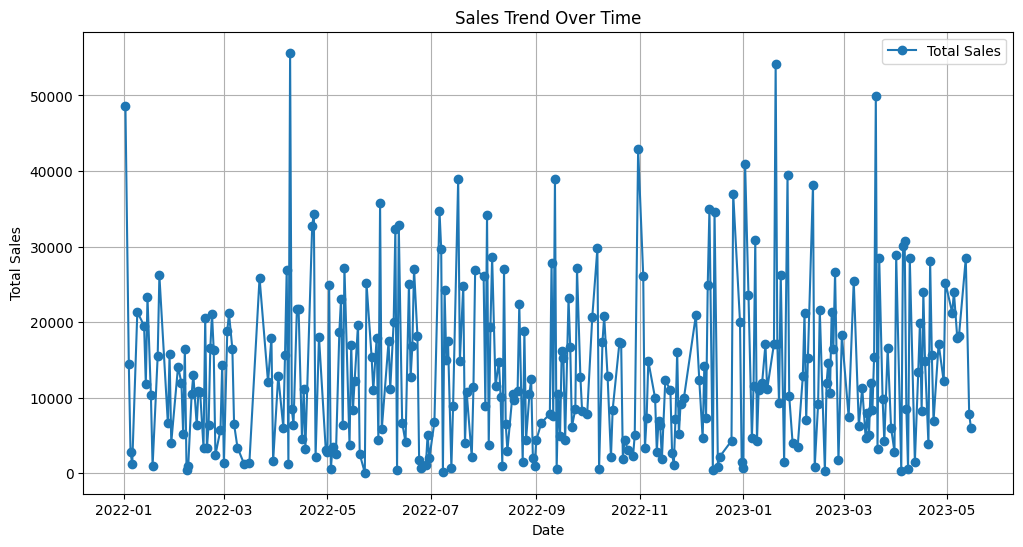

In [13]:
# Visualizing Sales Trends
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Total_Sales'], marker='o', linestyle='-', label='Total Sales')
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.grid()
plt.show()

In [15]:
# Time Series Forecasting using ARIMA
model = ARIMA(df['Total_Sales'], order=(5,1,0))
model_fit = model.fit()
df['Forecast_ARIMA'] = model_fit.predict(start=10, end=len(df), dynamic=False)

In [17]:
# Machine Learning Model for Prediction
df['Day'] = df.index
target = df['Total_Sales']
features = df[['Day']]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [19]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [21]:
# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"MAE: {mae}, MSE: {mse}")

MAE: 10877.951659999997, MSE: 194839587.94719213


In [23]:
# Save Results
df.to_csv("sales_forecast.csv")
print("Sales Forecasting Completed and Saved to sales_forecast.csv")

Sales Forecasting Completed and Saved to sales_forecast.csv
